# 1. Presentación 
---

El presente trabajo para la materia de **Pronósticos de la FES Acatlán para la carrera de MAC**, tiene la finalidad de mostrar como el análisis, las herramientas computacionales y los métodos de predicción nos abren la puerta a un rápido manejo de las **series de tiempo**, estas a su vez son colecciones de observaciones sobre un determinado fenómeno efectuadas en sucesivos momentos del tiempo, usualmente **equiespaciados**. 

Corresponde a una realización de un proceso generador de datos, los cuales nos dan una descripción de un fenómeno de interés. 

El equipo de **Viva Cristo Rey (VCR)** nos complace en presentar un trabajo que recopila el aprendizaje llevado en el curso. 

Para introducirlos presentaremos soluciones a 4 series de tiempo las cuales tienen ciertas variaciones en su estructura y presentaremos **descripciones gráficas, análisis de soluciones y comparaciones entre los métodos** para su distinción, recordando que en todo pronóstico la manera de evaluar es a través del **error** que estas presentan.   


## 1.1 Caracteristicas del proyecto
___

Utilizaremos en entorno de **Jupyter notebook** para presentar el trabajo esto nos da una ventaja, ya que es mas fácil poder divulgar el trabajo. Tambien tiene la caracteristica que se puede **ejecutar en cualquier sitio** con las herramientas básicas e internet ya que nuestros datos se encuentran almacendados en **GitHub** esto nos da una ventaja ya que basta con este archivo para poder estudiar y visualizar el proyecto.


liga:https://github.com/senties08/Python_Pandas_Pronosticos

También para visualizar algunos datos hacemos uso de código $LaTeX$, ya que este le da una vista mucho mas atractiva al trabajo de comparación.


## 1.2 Iniciación Técnica y definición de algunas funciones comparación. 

### Nota: si no es relevante el codigo puede pasar a la sección (2).

Primero tenemos que saber que en Python se tienen que **importar** las librerías de **pandas** para poder hacer uso de los **Dataframe**, herramienta que es una matriz la cual sirve para estudiar y hacer las predicciones, ocupamos **Nunpy** para hacer **cálculos y visualizar** datos al igual que una de sus **subfunciones** la cual es **Matplotlib** para tener una visualización mas **estética** de las series de tiempo.

*Lo anterior se hace de la siguiente forma:*


In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

Teniendo las herramientas básicas ya podríamos hacer algunas visualizaciones de los datos, en esta sección del trabajo viene algunas funciones que nos ayudaran al trayecto del trabajo, todo esto con finalidad de darle una estética y una forma más orgánica de ver los resultados y estudiarlos. 

Pero todo se puntualizará, utilizamos nombres intuitivos para hacer más cómodo el estudio y concentrarnos en las características de las series. 

*El siguiente fragmento de código nos ayudara a definir una función que nos mostrara las primeras (5) filas de las series de tiempo y su gráfica*

In [5]:
def Mostrar_Problema(a):
    if a==1:
        url_p1="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P1_Emigration_by_age_and_sex.csv"
        df_p1=pd.read_csv(url_p1,index_col=0 )
        print(df_p1.head(5))
        df_p1.plot(figsize=(10,6))
    
    elif a==2:
        url_p2="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P2_Air_Passenger_Transport.csv"
        df_p2=pd.read_csv(url_p2)
        print(df_p2.head(5))
        df_p2.plot(figsize=(10,6))
    elif a==3:
        url_p3="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P3_Persons_Employed_In_Science___Techonology.csv"
        df_p3=pd.read_csv(url_p3)
        print(df_p3.head(5))
    
    else:
        print("Numero de problema no valido")

#### Con estos pasos ya podremos empezar a visualizar nuestras series de tiempo para tratarlas.

# Analisis y graficas de los problemas
---

           Spain
TIME            
1996-12  3455940
1997-01  2898480
1997-02  3399058
1997-03  5318677
1997-04  5113152


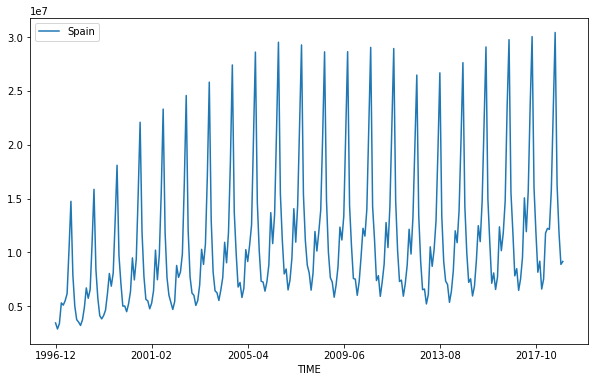

In [6]:
Mostrar_Problema(1)


\begin{equation}
\begin{array}{cc} \hline
\text{Elementos que componen a $S_t$} \\ \hline
\text{Tendencia}               & \text{Lineal Creciente}      \\
\text{Estacionalidad}          & S=12                  \\
\text{Ciclo}                   & \text{No}                    \\
\text{Error}                   & \text{Si}                    \\
\text{Datos atipicos}       & \text{No}                   \\ \hline
\end{array}
\end{equation}


La siguiente tabla resume que metodos son aplicables a la serie de tiempo 1, asi, como aquellos que no lo son, y, sus causas

\begin{array}{ccc} \hline
\text{Metodo}                                  & \text{Aplica} & \text{Causas}                                               \\ \hline
\text{Promedio Movil Simple}                   & \text{No}     & \text{La serie presenta tendencia y   estacionalidad}       \\
\text{Promedio Movil   Ponderado}              & \text{No}      & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Promedio Movil   Doble}                  & \text{No}      & \text{La serie presenta   estacionalidad}                   \\
\text{Suavisamiento   Exponencial Simple}      & \text{No}      & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Brown}                       & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de Holt}                          & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Holt-Winters Multiplicativo} & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Holt-Winters Aditivo}        & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Descomposicion}              & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad Anual}\\ \hline
\end{array}

### Anexamos seccion de errores para el problema 1 

In [7]:

def errores(y_real,y_pred):

    df['e(t)'] = y_real - y_pred
    df['|e(t)|'] = np.abs(df['e(t)'])
    df['e(t)^2'] = df['e(t)']**2
    df['|e(t)|/y(t)'] = [df['|e(t)|'][i] / y_real[i] for i in range(len(y_real))]

    dam = np.mean(df['|e(t)|'])
    mse = np.mean(df['e(t)^2'])
    pema = np.mean(df['|e(t)|/y(t)'])

    t_err = pd.DataFrame([[dam, mse, pema*100]],columns=['DAM', 'MSE', 'PEMA'])

    print('Tabla de errores:\n', df,
          '\nEstadisticos de error:\n', t_err)
    

REGRESION LINEAL SIMPLE

In [ ]:
periodo = [1,2,3,4,5,6,7,8,9,10,11,12]
edad = [20,21,15,14,13,16,17,18,20,20,21,23]
df = pd.DataFrame()

df['periodo'] = periodo
df['edad'] = edad


In [ ]:
x_mean = df['periodo'].mean()
y_mean = df['edad'].mean()
print(x_mean, y_mean)

In [ ]:
# x-X ^2

df['(x-X)^2'] = [(periodo[i] - x_mean)**2 for i in range(len(periodo))]
desv_x = np.std(periodo)
desv_y = np.std(edad)
cov_xy = np.cov(periodo,edad)[0][1]
print(desv_x, desv_y, cov_xy)

In [ ]:
b = cov_xy/(1/len(periodo) * np.sum(df['(x-X)^2']))
a = y_mean -b*x_mean


In [ ]:
df['y_'] = [a + b*periodo[i] for i in range(len(periodo))]

In [ ]:
r_ = b*(desv_x/desv_y)
r_2 = r_**2


In [ ]:

### pasar todo a funcion...
def lin_reg (varx, vary):
    import pandas as pd
    import numpy as np
    data = pd.DataFrame()
    data['X'] = varx
    data['Y'] = vary
    
    x_mean = varx.mean()
    y_mean = vary.mean()
    data['(dif_x)^2'] = [(varx[i] - x_mean)**2 for i in range(len(varx))]
    desv_x = np.std(varx)
    desv_y = np.std(vary)
    #cov etre x y y_
    cov_xy = np.cov(varx,vary)[0][1]
    b = cov_xy/(1/len(varx) * np.sum(data['(dif_x)^2']))
    a = y_mean - b*x_mean
    
    #prediccion
    data['y_pred'] = [a + b*varx[i] for i in range(len(varx))]
    
    r = b*(desv_x/desv_y)
    r_2 = r**2
    
    print('DATAFRAME:\n', data, '\nEcuacion de la recta que describe el modelo:',
         '\n y = {:.2f} + {:.2f} * x'.format(a,b),
         '\nCoeficiente de correlacion: ', r,
         '\nCoeficiente de determinacion: ', r_2)

REGRESION MULTIPLE

In [ ]:
df

## PROMEDIO SIMPLE

In [ ]:
def prom_simp(tiempo ,y_real):
    import pandas as pd
    import numpy as np
    
    data = pd.DataFrame()
    data['t'] = tiempo
    data['y'] = y_real
    
    data['pronostico'] = np.mean(y_real)
    ## poner todas las columnas...
    pred = {'t':len(tiempo) + 1, 'y': np.nan , 'pronostico' :np.mean(y_real) }
    data = data.append(pred, ignore_index = True)
    data['pronostico'][0] = np.nan
    print(data)
    
    print(f'el pronostco para el perido {len(tiempo) + 1} es: ', np.mean(y_real))
    
    #data['resta'] = data['y'] - data['pronostico']
    
    errores(data['y'], data['pronostico'])

In [ ]:
prom_simp(periodo, edad)

## probar con otros datos...

PROMEDIO MOVIL SIMPLE

In [ ]:
def PMS(n,tiempo, y_real):
    import pandas as pd
    import numpy as np
    
    data = pd.DataFrame()
    
    data['t'] = tiempo
    data['y'] = y_real
    data['n='+ str(n)] = np.nan
    
    pred = {'t':len(tiempo) + 1, 'y': np.nan , 'n='+ str(n) :np.nan }
    data = data.append(pred, ignore_index = True)
    
    data['n='+ str(n)] = [np.mean(data['y'].iloc[i-n:i]) for i in range(len(data['y'])) ]
    pronostico = data['n='+ str(n)].loc[len(data['y'])-1]
    
    print(data)
    print(f'\nEl pronosotico para el perdiodo {tiempo[-1] +1} es: ', pronostico, '\n')
    
    errores(data['y'],data['n='+ str(n)])
    ##ya quedo

In [ ]:
#DATOS DE PRUEBA
tiempo = [i+1 for i in range(11)]
ventas = [2710,2910,2830,2679,2750,2880,2655,2825,2740,2873,2785]

PMS(2, tiempo, ventas)

PROMEDIO MOVIL DOBLE

In [ ]:
def Mostrar_Problema(a):
    if a==1:
        url_p1="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P1_Emigration_by_age_and_sex.csv"
        df_p1=pd.read_csv(url_p1,index_col=0 )
        print(df_p1.head(5))
        df_p1.plot(figsize=(10,6))
    
    elif a==2:
        url_p2="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P2_Air_Passenger_Transport.csv"
        df_p2=pd.read_csv(url_p2)
        print(df_p2.head(5))
        df_p2.plot(figsize=(10,6))
    elif a==3:
        url_p3="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P3_Persons_Employed_In_Science___Techonology.csv"
        df_p3=pd.read_csv(url_p3)
        print(df_p3.head(5))
    
    else:
        print("Numero de problema no valido")